### 3.4 Bell State Creation and Measurement Using Cirq

In [2]:
# Import Cirq
import cirq

# Define two qubits using LineQubit
q_register = [cirq.LineQubit(i) for i in range(2)]

# Define the circuit: Hadamard on qubit 0 followed by CNOT (entangling)
circuit = cirq.Circuit([
    cirq.H(q_register[0]),
    cirq.CNOT(q_register[0], q_register[1])
])

# Measure both qubits
circuit.append(cirq.measure(*q_register, key='z'))

# Print the circuit
print("Circuit:")
print(circuit)

# Define the simulator
sim = cirq.Simulator()

# Simulate the circuit for 100 repetitions
output = sim.run(circuit, repetitions=100)

# Print measurement histogram
print("Measurement Output:")
print(output.histogram(key='z'))


Circuit:
0: ───H───@───M('z')───
          │   │
1: ───────X───M────────
Measurement Output:
Counter({0: 55, 3: 45})


### 3.5 Bell State Creation and Measurement Using Qiskit


Total count for 00 and 11 are: {'00': 543, '11': 457}
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


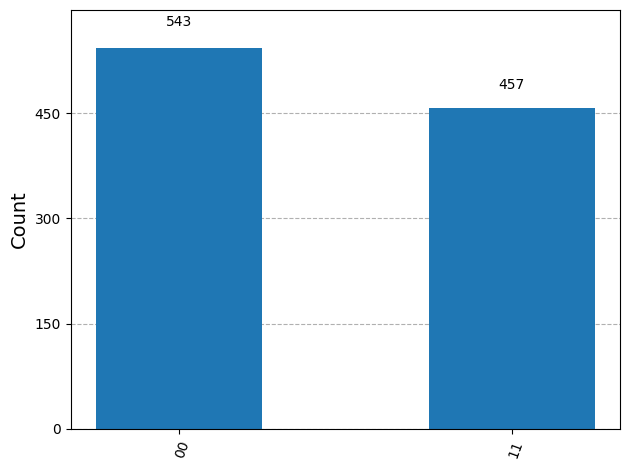

In [3]:
"""
This script creates a simple quantum circuit that generates a Bell state using Qiskit.
It applies a Hadamard gate followed by a CNOT gate, measures the qubits, and simulates the circuit using the Aer simulator.
"""

# Import required libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a Quantum Circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate on qubit 0 to create superposition
qc.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Use AerSimulator as backend
backend = AerSimulator()

# Run the circuit with 1000 shots
result = backend.run(qc, shots=1000).result()

# Get measurement counts
counts = result.get_counts()
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
print(qc.draw(output='text'))

# Plot histogram
plot_histogram(counts)
